In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
def generate_data(n=50, noise=5.0):
   #n: Number of data points.

#noise: Amount of noise to simulate realism.

#np.random.seed(42): To make the random results repeatable (give the same results every time).


    np.random.seed(42)
    studytime = np.linspace(1 , 10, n)
#np.linspace: Generate n numbers between -10 and +10 → these are the input x.
    # Ground truth line: y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n) * noise
#Generate random noise from a normal (Gaussian) distribution with standard deviation noise.
    G3 = true_slope * studytime + true_intercept + noise
    return studytime, G3
    # G3 = Final score

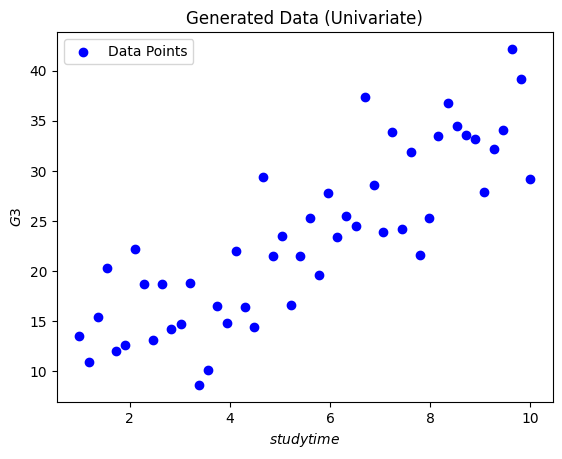

In [64]:
studytime, G3 = generate_data(n=50, noise=5.0)
plt.scatter(studytime, G3, color='blue', label='Data Points')
plt.title("Generated Data (Univariate)")
plt.xlabel("$studytime$")
plt.ylabel("$G3$")
plt.legend()
plt.show()


In [66]:
def polynomial_features(studytime, degree):
    X_poly = np.c_[np.ones(len(studytime))]
    for i in range(1, degree + 1):
        X_poly = np.c_[X_poly, studytime**i]
    return X_poly

In [67]:
def polynomial_regression(studytime, G3, degree):
    X_poly = polynomial_features(studytime, degree)
    # Closed-form solution: w = (X'^T * X')^-1 * X'^T * y
#This is the same method used in classic linear regression (without Gradient Descent).

    w = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(G3)
    return w

m = 5 # Degree of the polynomial regression
w_ms   = polynomial_regression(studytime, G3, m)  # Parameter vector w

print(f"Parameters (w) for Degree {m}: {w_ms  }")

Parameters (w) for Degree 5: [ 4.08851432e+00  1.63611155e+01 -8.69439174e+00  2.06503158e+00
 -2.07574851e-01  7.48804519e-03]


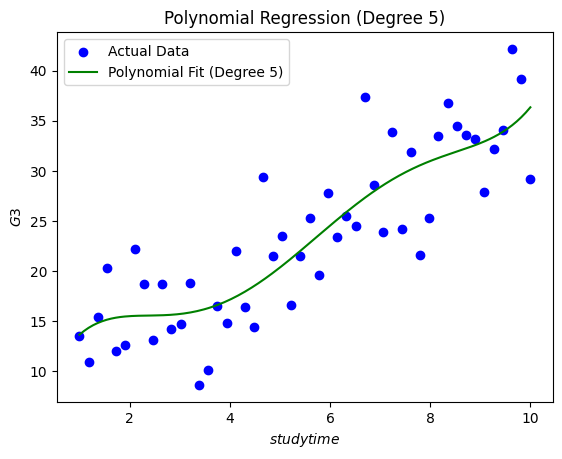

In [68]:
X_fit = np.linspace(studytime.min(), studytime.max(), 200)
X_fit_poly = polynomial_features(X_fit, m)
y_poly_pred = X_fit_poly.dot(w_ms ) # Parameter vector w
  # h_w(x) = X' * w

# Plot the actual data and the polynomial fit
plt.scatter(studytime, G3, color='blue', label='Actual Data')
plt.plot(X_fit, y_poly_pred, color='green', label=f'Polynomial Fit (Degree {m})')
# ​Green line → The curve that your model has learned to "fit" the data.
# Calculate the y_poly_pred model value x This curve is the prediction of the polynomial regression model. That is, for each value
#If the model is good and the polynomial degree is chosen appropriately:

#The green line follows the general trend of the data.

#But if the degree is too large, the curve may become too twisted and oscillating (overfitting).

#If the degree is too small, it may not capture the curvature of the data well (underfitting).
plt.title(f"Polynomial Regression (Degree {m})")
plt.xlabel("$studytime$")
plt.ylabel("$G3$")
plt.legend()
plt.show()

Visualizing  Erms  The Root Mean Square Error (RMSE) helps us understand how well our model fits the data.

In [69]:
def compute_rms_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))
    #RMS Error is a standard measure of error. The lower it is, the better the model predicts.

### Visualizing RMSE for different Polynomial degrees
We could visualize the $ E_{rms} $ better if we split generated data into train and test datasets:

Degree 0: Train RMSE = 8.32, Test RMSE = 8.88


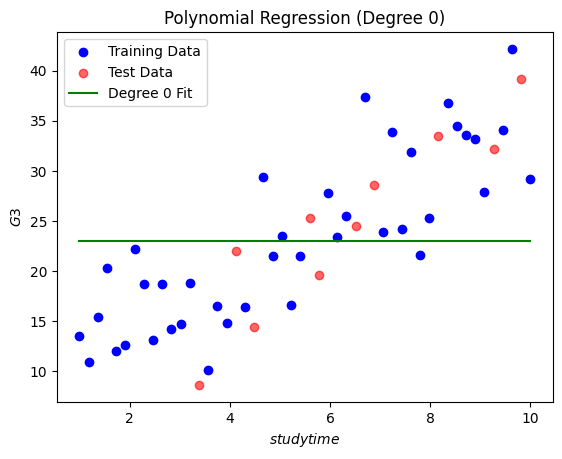

Degree 1: Train RMSE = 4.58, Test RMSE = 4.49


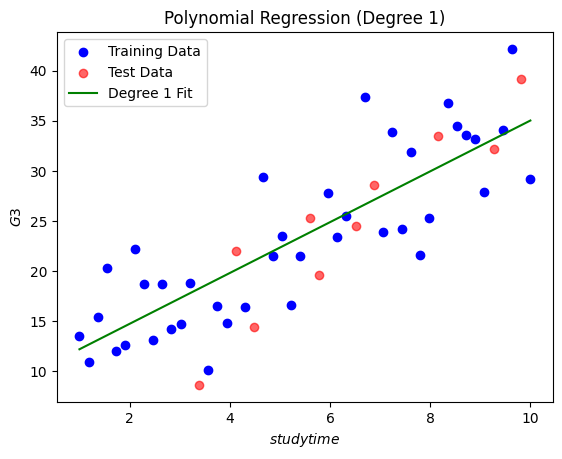

Degree 2: Train RMSE = 4.55, Test RMSE = 4.24


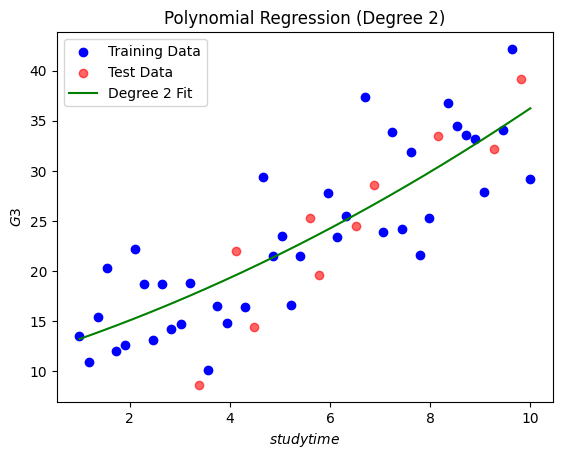

Degree 3: Train RMSE = 4.47, Test RMSE = 4.12


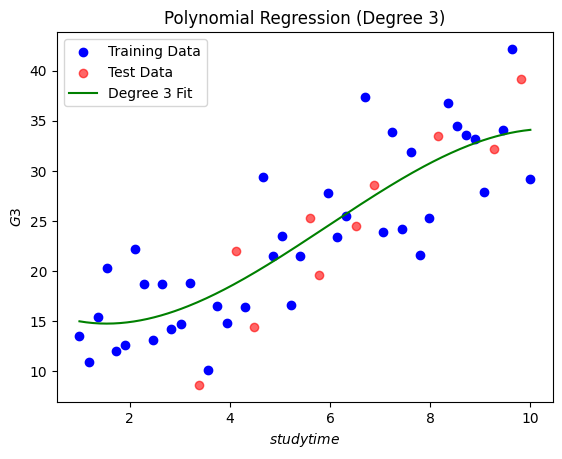

Degree 4: Train RMSE = 4.47, Test RMSE = 4.14


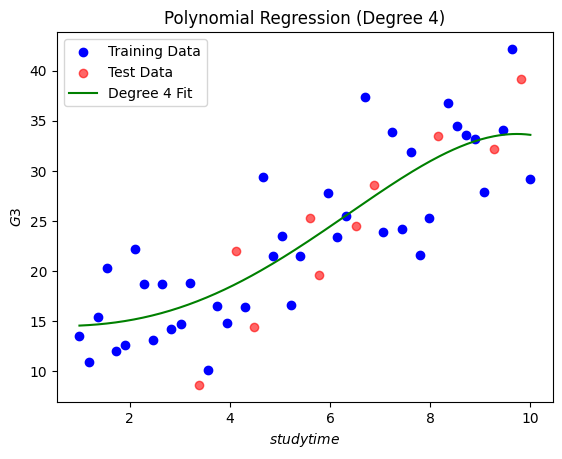

Degree 5: Train RMSE = 4.44, Test RMSE = 4.03


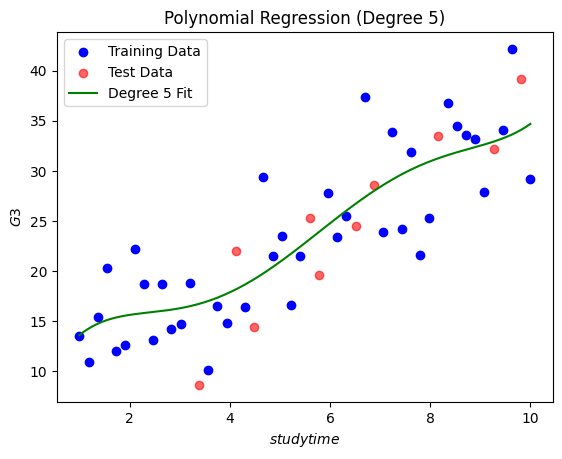

Degree 6: Train RMSE = 4.26, Test RMSE = 4.15


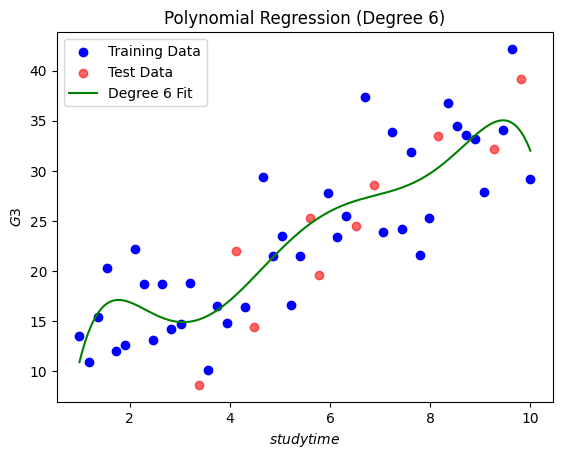

Degree 7: Train RMSE = 4.20, Test RMSE = 4.39


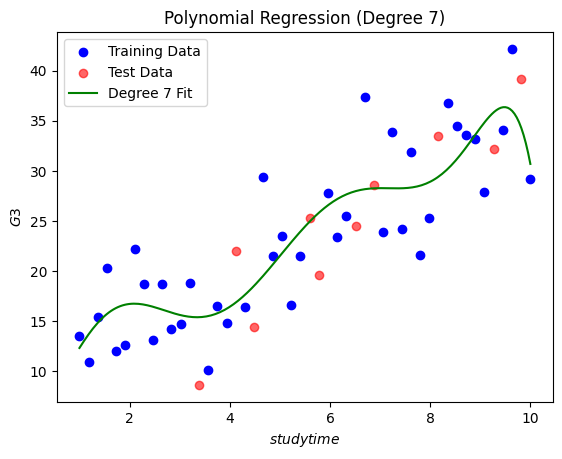

Degree 8: Train RMSE = 4.20, Test RMSE = 4.39


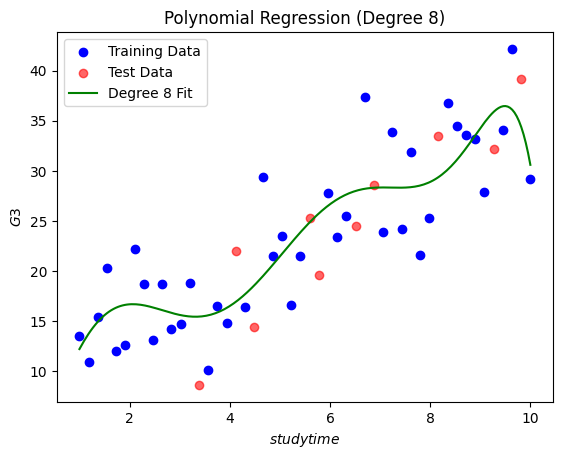

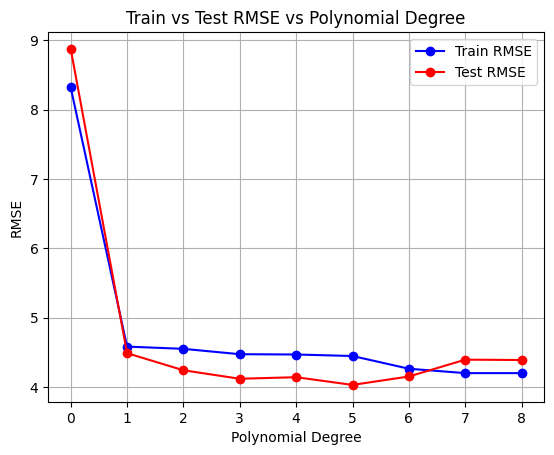

In [76]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(studytime, G3, test_size=0.2, random_state=42)

degrees = range(0, 9)
train_rms_errors = []
test_rms_errors = []


for d in degrees:
    # Train the model on the training set
    w_ms = polynomial_regression(X_train, y_train, d)

    # Compute predictions for the training set
    X_train_poly = polynomial_features(X_train, d)
    y_train_pred = X_train_poly.dot(w_ms)


    # Compute predictions for the test set
    X_test_poly = polynomial_features(X_test, d)
    y_test_pred = X_test_poly.dot(w_ms)

    # Calculate RMSE for both training and test sets
    train_rms_error = compute_rms_error(y_train, y_train_pred)
    test_rms_error = compute_rms_error(y_test, y_test_pred)

    # Store the errors
    train_rms_errors.append(train_rms_error)
    test_rms_errors.append(test_rms_error)

    # Print the RMSE for the current degree
    print(f"Degree {d}: Train RMSE = {train_rms_error:.2f}, Test RMSE = {test_rms_error:.2f}")

    # Plot the polynomial fit on the training data
    plt.scatter(X_train, y_train, color='blue', label="Training Data")
    plt.scatter(X_test, y_test, color='red', label="Test Data", alpha=0.6)
    X_fit = np.linspace(studytime.min(), studytime.max(), 200)
    X_fit_poly = polynomial_features(X_fit, d)
    y_fit_pred = X_fit_poly.dot(w_ms)
    plt.plot(X_fit, y_fit_pred, label=f"Degree {d} Fit", color='green')
    plt.title(f"Polynomial Regression (Degree {d})")
    plt.xlabel("$studytime$")
    plt.ylabel("$G3$")
    plt.legend()
    plt.show()

# Plot RMSE for training and test sets
plt.plot(degrees, train_rms_errors, marker='o', linestyle='-', color='blue', label='Train RMSE')
plt.plot(degrees, test_rms_errors, marker='o', linestyle='-', color='red', label='Test RMSE')
plt.title("Train vs Test RMSE vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()

Full interpretation 🟢 Degree 0 (Fixed model - only mean): This model predicts only a fixed value (no x is involved).

RMSE is very high (Train = 26.46, Test = 26.44) → Severe underfitting; the model does not consider any relationship between X and y.

🟢 Degree 1 (Linear model): Here a linear model (i.e. 𝑦 = 𝑤 1 𝑥 + 𝑤 0 y=w 1​x+w 0​) is used.

RMSE is much better (Train = 9.16, Test = 8.97) → The model has learned the overall pattern of the data.

🟢 Degrees 2 to 5 (simple polynomial models): The errors get smaller over time.

Train and Test RMSE are close to each other in degrees 3 to 5:

Degree 3: Test RMSE = 8.23

Degree 5: Test RMSE = 8.06 (lowest error!)

✅ This means:

The model is well trained and not overfitting.

The model accuracy is improving without increasing the test error.

🟡 Degree 6 and 7: Train RMSE is still decreasing (reaching 8.40).

But Test RMSE starts to increase.

Degree 7: Test RMSE = 8.81

❗ Signs of Overfitting are appearing:

The model is overfitting itself to the training data.

But on new data (Test) the performance is getting worse.

🔴 Degree 8: Train RMSE suddenly increases: 14.12

Test RMSE also increases significantly: 15.38

❌ Severe Overfitting:

The model has become so complex that instead of learning the pattern, it has learned the data noise.

This has caused both the accuracy on the training data and on the test data to decrease.

📈 RMSE chart (Train vs Test vs Degree) In this chart, we usually have three areas:

Underfitting (degrees 0 to 1) The error is high on both sets.

The model is too simple to learn the data pattern.

Optimal Fit (degrees 2 to 5) The error is low.

The model has learned the pattern well and also performs well on the test.

The best result is at Degree = 5

Overfitting (degrees 6 to 8) The test error increases.

The model has become too complex and has learned the data noise.

✅ Overall conclusion: The best model for your data, based on RMSE, is the Polynomial Degree = 5 model.

This model strikes a good balance between complexity and accuracy.

Higher degrees cause overfitting, especially from Degree = 7 onwards.

## Gradient Descent:
In this section, we will use the popular iterative method called **Gradient Descent** to solve the regression problem.

Assuming we need to find $ w_0\ and\ w_1 $ in the problem of linear regression, update rule using gradinet descent will be:
$$
\begin{array}{l}
w_0 \leftarrow w_0 - \eta \frac{\partial J}{\partial w_0} = w_0 - \eta \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) \\
w_1 \leftarrow w_1 - \eta \frac{\partial J}{\partial w_1} = w_1 - \eta \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) (x^{(i)}) \\
\end{array}
$$

In which $ \eta $ is the learning rate. To overcome the problem of overflow, assume cost function is $ J(\mathbf{w}) = \frac{SSE}{training \ \ size} $

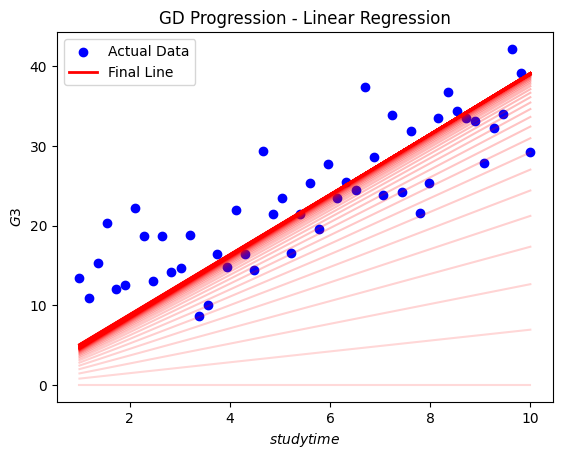

In [72]:
# SSE cost function
def h_w(X, w):
    return w[0] + w[1] * X

def cost_function(studytime, G3, w):
    return np.sum((h_w(studytime, w) - G3)**2) / len(studytime)

# Gradient descent
def gradient_descent(studytime, G3_Score, w, alpha, num_iters):
#num_iters: Number of iterations
    m = len(studytime)
    cost_history = []
    w_history = [w.copy()]

    for i in range(num_iters):
        # updates
        gradient_w0 = np.sum(h_w(studytime, w) - G3_Score) / m
        gradient_w1 = np.sum((h_w(studytime, w) - G3_Score) * studytime) / m
        w[0] -= alpha * gradient_w0
        w[1] -= alpha * gradient_w1
# alpha determines the size of each step. Too much may cause instability, too little may cause slowness.

        cost_history.append(cost_function(studytime, G3_Score, w))
        w_history.append(w.copy())  # Store a copy of w, not the reference

    return w, cost_history, w_history

w_initial = [0, 0]  # Start with w0 = 0, w1 = 0
eta = 0.001
num_iters = 500
#eta is the learning rate

# Run Gradient Descent
w_final, cost_history, w_history = gradient_descent(studytime, G3, w_initial, eta, num_iters)

# Visualize cost function (log of J(w))
w0_vals = np.linspace(-10, 20, 100)
w1_vals = np.linspace(-1, 5, 100)
J_vals = np.zeros((len(w0_vals), len(w1_vals)))

for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w = [w0_vals[i], w1_vals[j]]
        J_vals[i, j] = cost_function(studytime, G3, w)

# Plot GD Progression (without labels for lines, different alphas)
plt.scatter(studytime, G3, color='blue', label='Actual Data')

# Plot lines for every 50th step with increasing alpha
for idx, w in enumerate(w_history[::num_iters // 100]):
    alpha = 0.15 + 0.85*(idx) / 100  # Gradually increase alpha for each line
    plt.plot(studytime, h_w(studytime, w), color='red', alpha=alpha)

# Final line in bold
plt.plot(studytime, h_w(studytime, w_final), color='red', lw=2, label='Final Line')

plt.title("GD Progression - Linear Regression")
plt.xlabel("$studytime$")
plt.ylabel("$G3$")
plt.legend()
plt.show()

📊 What does the graph show?

🔵 Blue dots (Actual Data)
These are the actual data.

X-axis: Study time

Y-axis: Final grade or student performance (G3)

Each dot represents a student.

🔴 Light red lines
These are the regression lines drawn during the iterations of the Gradient Descent algorithm.

Each line represents a step in the parameter update.

It starts with the lighter (initial) lines and goes to the final bold line.

🔴 Bold red line (Final Line)
This is the final regression line.

After the algorithm has run its full length, this is the best linear fit to the data.

🧠 Behind-the-scenes algorithm:
The linear regression model uses the simple equation y = mx + b.

The Gradient Descent algorithm updates the coefficients m and b step by step to find the optimal line that has the lowest error (Cost).

At each iteration, a new line is drawn representing the new parameters.

### Plotting cost function
To get a better sense of SSE cost function, let's visualize it for univariate linear regression discussed:

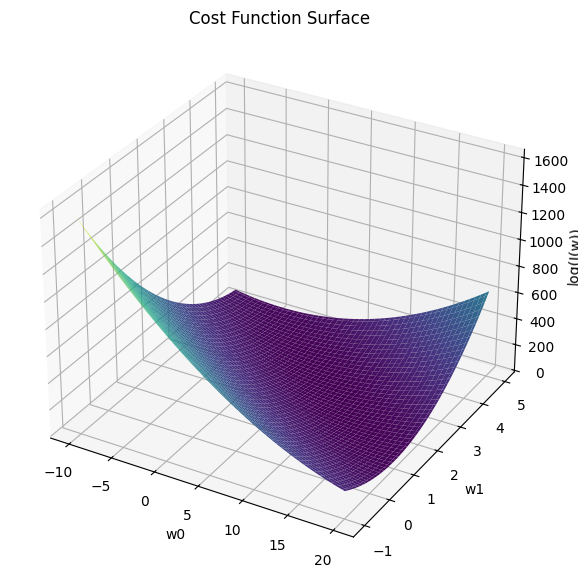

In [73]:
# 3D Plot of J(w)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, J_vals.T, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface")
plt.show()

📈 Why is the logarithm log(J(w)) used?
The cost function usually has very large or very small values. Plotting it without the logarithm may result in subtle changes not being visible or the scale being too large. By taking the logarithm:

The changes are better visible.

The scale of the axes becomes more controllable.

By looking at this graph, you can see which region of space has the lowest error, and whether the cost function is convex or not (which is important to ensure the success of gradient descent).

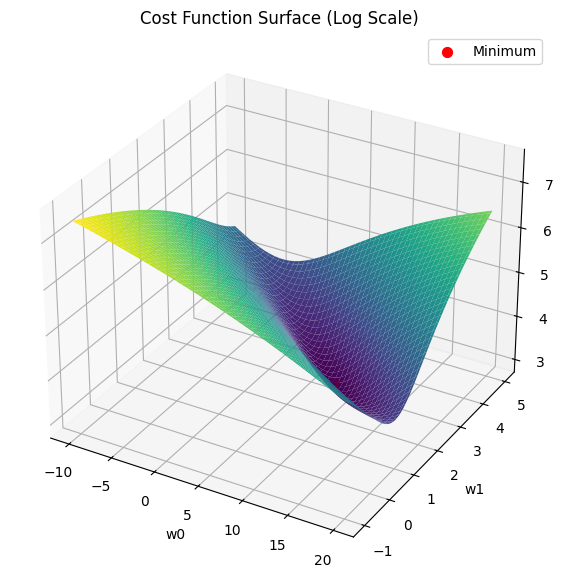

In [74]:
# 3D Plot of log J(w)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Z = np.log(np.clip(J_vals.T, 1e-10, None))
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, Z, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
min_cost = np.min(J_vals)
min_idx = np.unravel_index(np.argmin(J_vals), J_vals.shape)
best_w0 = w0_vals[min_idx[0]]
best_w1 = w1_vals[min_idx[1]]

ax.scatter(best_w0, best_w1, np.log(min_cost), color='red', s=50, label='Minimum')
ax.legend()

plt.title("Cost Function Surface (Log Scale)")
plt.show()

Gradient descent tries to reach minimum point of the plot above in each step. But are we actually reaching our goal ? Let's visualize it:

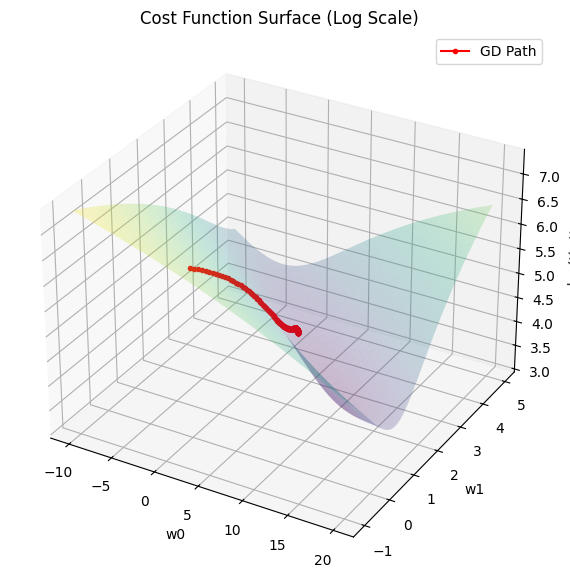

In [75]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, np.log(J_vals.T), cmap='viridis', alpha=0.25)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface (Log Scale)")

# Plot the points on the 3D surface for each GD iteration
w_history_array = np.array(w_history)
w0_history = w_history_array[:-1, 0]
w1_history = w_history_array[:-1, 1]
cost_history_log = np.log(np.array(cost_history))



# Plot the path of gradient descent in 3D
ax.plot(w0_history[:num_iters], w1_history[:num_iters], cost_history_log, marker='o', color='r', label='GD Path', markersize=3)

plt.legend()
plt.show()

### Effect of learning rate ($ \eta $)
Choosing $ \eta $ could be tricky. Large learning rates can lead to divergence. Small learning rates on the other hand could slow down the convergence by requiring more iterations:

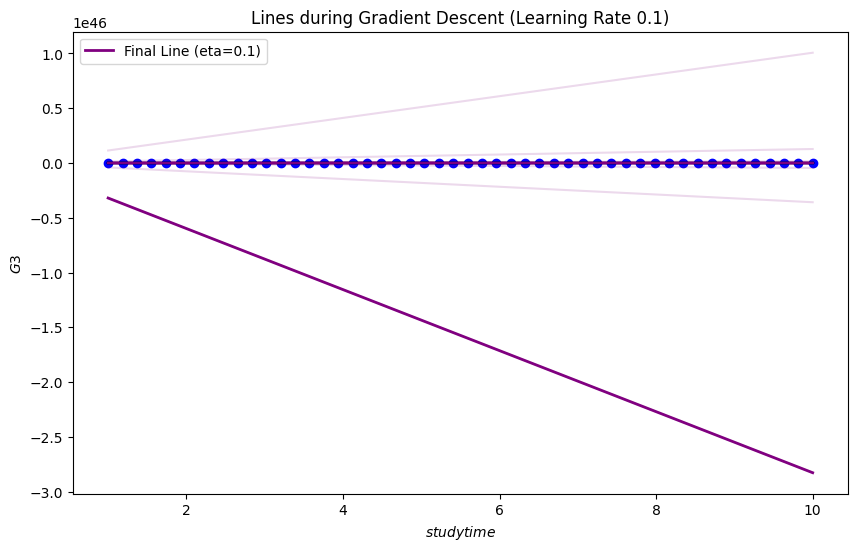

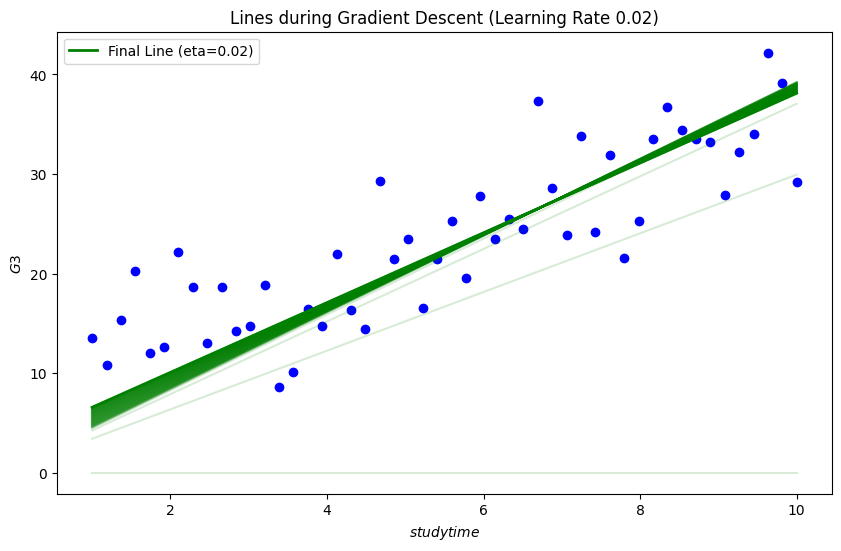

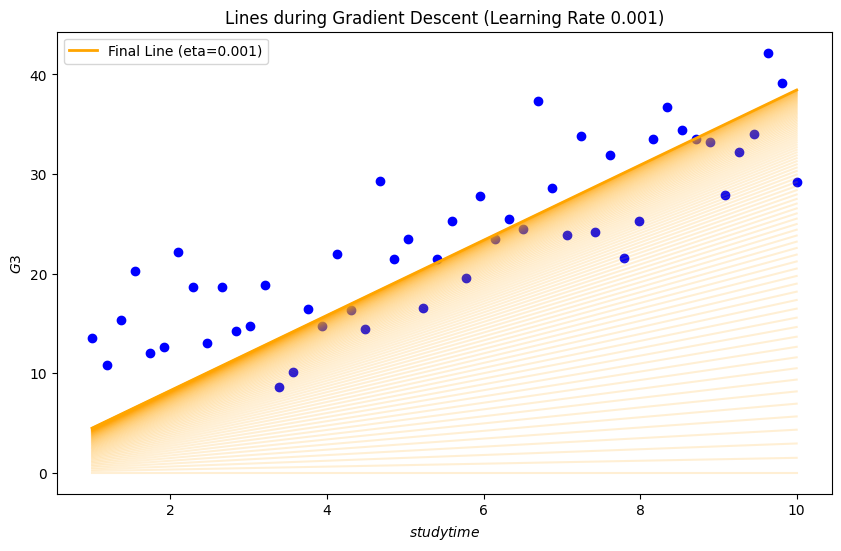

In [78]:
learning_rates = [0.1, 0.02, 0.001]
#A list of learning rates (eta) used to compare their impact on the training process.
num_iters = 100
#Number of iterations (epochs) for gradient descent.
w_initial = [0, 0]
#The initial value of the linear model coefficients w = [w0, w1], which is considered to be zero.
colors = ['purple', 'green', 'orange']

w0_vals = np.linspace(-10, 20, 100)
w1_vals = np.linspace(-1, 5, 100)
J_vals = np.zeros((len(w0_vals), len(w1_vals)))

for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w = [w0_vals[i], w1_vals[j]]
        J_vals[i, j] = cost_function(studytime, G3, w)

cost_histories = []
#To store the cost function history at any learning rate.

# GD for each eta
for idx, eta in enumerate(learning_rates):
    w_final, cost_history, w_history = gradient_descent(studytime, G3, w_initial.copy(), eta, num_iters)
    cost_histories.append(cost_history)

    plt.figure(figsize=(10, 6))
    for step_idx, w in enumerate(w_history[::num_iters // 100]):
        alpha_val = 0.15 + 0.85*(idx) / 100
        plt.plot(studytime, h_w(studytime, w), color=colors[idx], alpha=alpha_val)
        #alpha_val controls the transparency of the line. This makes the initial lines appear lighter.

    plt.plot(studytime, h_w(studytime, w_final), lw=2, label=f'Final Line (eta={eta})', color=colors[idx])
    plt.title(f"Lines during Gradient Descent (Learning Rate {eta})")
    plt.xlabel("$studytime$")
    plt.ylabel("$G3$")
    plt.legend()
    plt.scatter(studytime, G3, color='blue', label='Actual Data')
    plt.show()

As shown in the plots above, choosing a large learning rate leads to divergence. In this example, the update rule keeps making weights larger and larger and the weights will never converge. Choosing a small learning rate on the other hand, leads to slow convergence. In this example, learning $ w_0 $ is happening at a slow time because the update rule is being changed almost minimially !

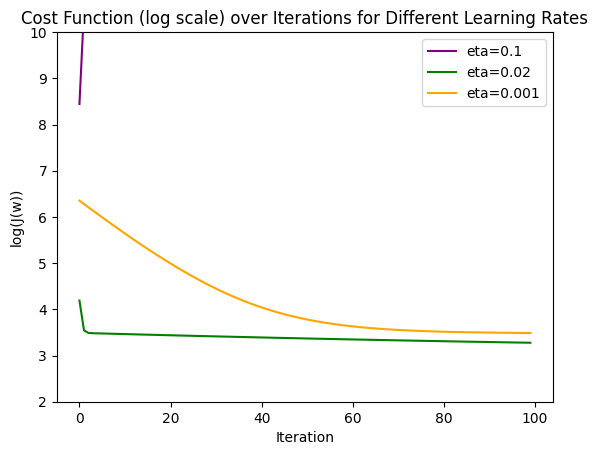

In [79]:
plt.title("Cost Function (log scale) over Iterations for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("log(J(w))")
for idx in range(len(cost_histories)):
  plt.plot(np.log(cost_histories[idx]), label=f'eta={learning_rates[idx]}', color=colors[idx])
plt.ylim(bottom=2, top=10)
plt.legend()
plt.show()

## Regularization: Ridge and Lasso Regression
In this section, we will try to visualize the effect of regularization using **L1 norm (Lasso regression)** and **L2 norm (Ridge regression)**. Let us have a small number of datapoints and try to fit a complex model to it:

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

def generate_data(n=100, noise=10.0):
    np.random.seed(42)
    studytime = np.random.uniform(-10, 10, n)
    G3 = studytime**2 - 2 * studytime + np.random.randn(n) * noise  # x**2 - 2*x + noise
    #The goal is to create a problem with nonlinear (second-order) dependence and noise.
    return studytime, G3

studytime, G3 = generate_data(n=15)
X_train, X_test, y_train, y_test = train_test_split(studytime, G3, test_size=0.2, random_state=42)

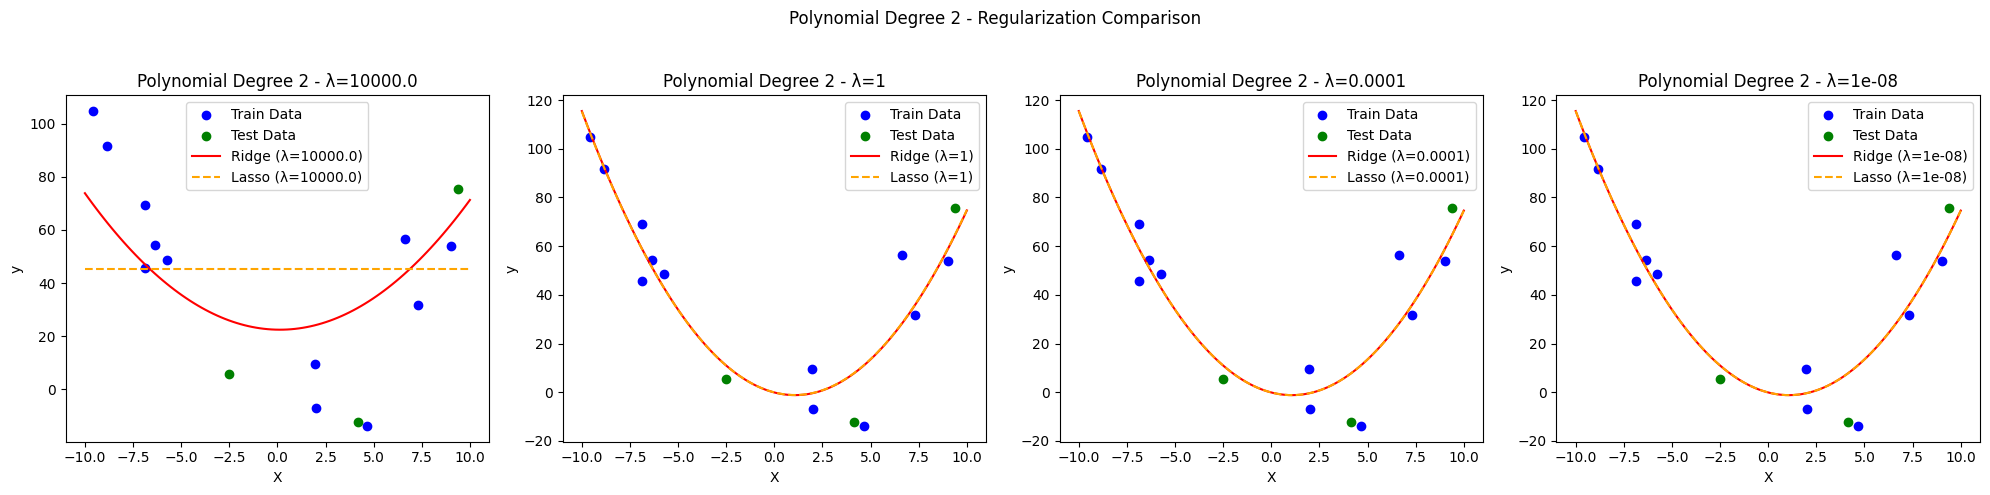

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.735e+00, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.588e+02, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.30953e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_d

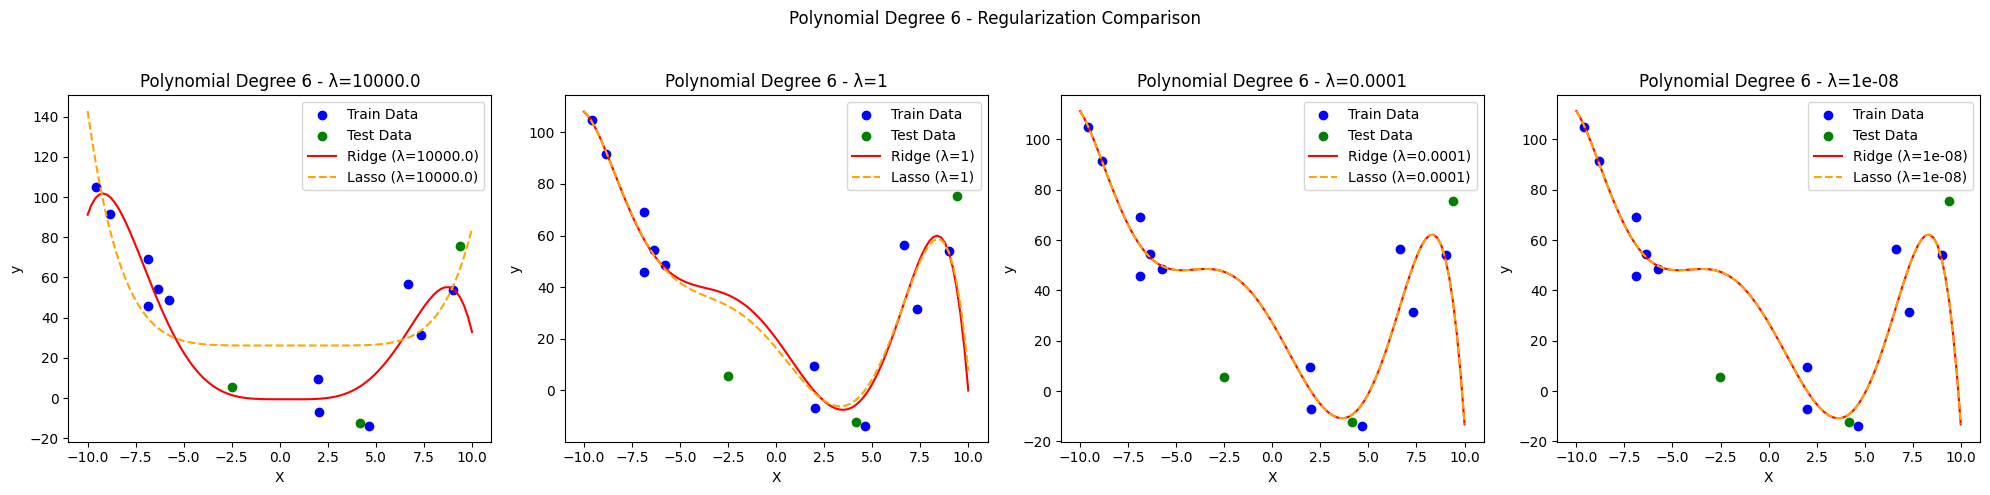

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.824e+02, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.58344e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.461e+02, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215

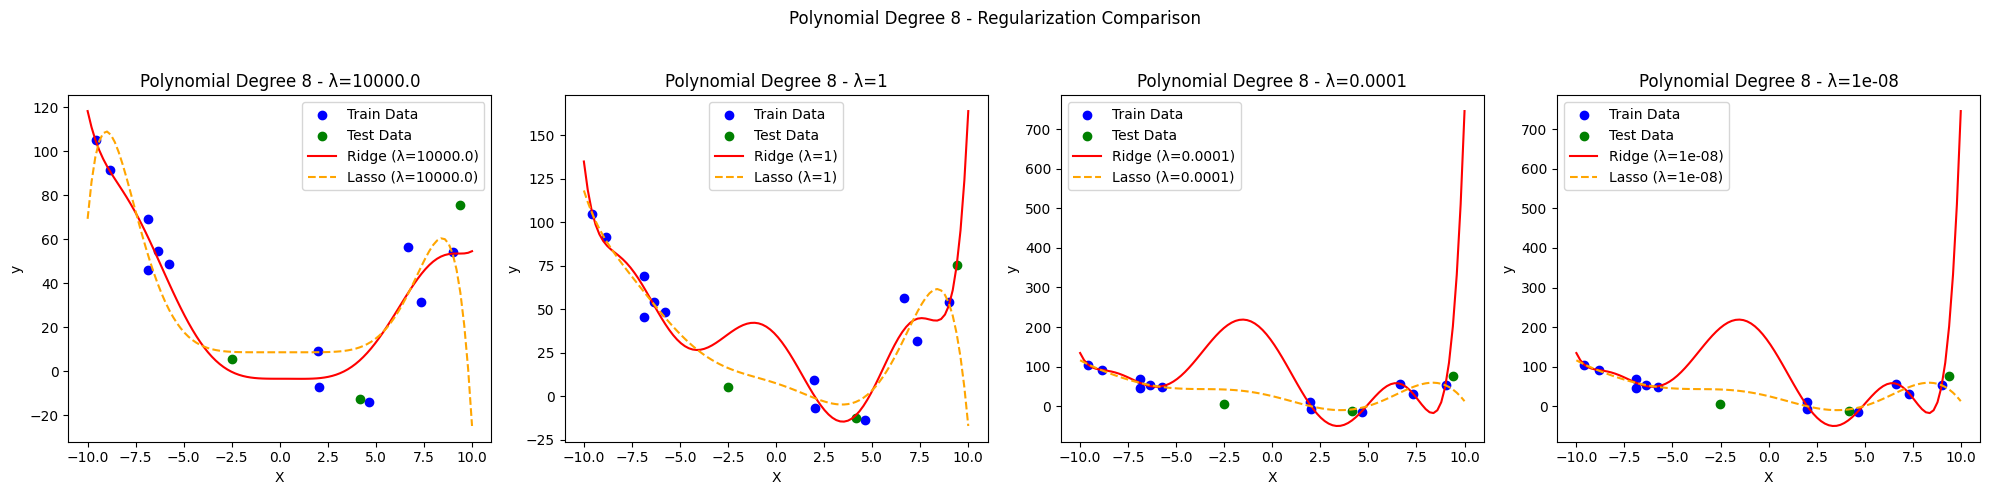

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

degrees = [2, 6, 8]
lambdas = [1e4, 1, 1e-4, 1e-8]

ridge_rmse_train = np.zeros((len(degrees), len(lambdas)))
ridge_rmse_test = np.zeros((len(degrees), len(lambdas)))
lasso_rmse_train = np.zeros((len(degrees), len(lambdas)))
lasso_rmse_test = np.zeros((len(degrees), len(lambdas)))

for degree_idx, degree in enumerate(degrees):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Create a 1x4 grid of subplots
    for lambda_idx, lambda_val in enumerate(lambdas):
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(X_train[:, np.newaxis])
        X_test_poly = poly_features.transform(X_test[:, np.newaxis])

        # Ridge Regression using scikit-learn
        ridge_model = Ridge(alpha=lambda_val)
        ridge_model.fit(X_train_poly, y_train)
        y_train_pred_ridge = ridge_model.predict(X_train_poly)
        y_test_pred_ridge = ridge_model.predict(X_test_poly)

        # Lasso Regression using scikit-learn
        lasso_model = Lasso(alpha=lambda_val, max_iter=10000)
        lasso_model.fit(X_train_poly, y_train)
        y_train_pred_lasso = lasso_model.predict(X_train_poly)
        y_test_pred_lasso = lasso_model.predict(X_test_poly)

        ridge_rmse_train[degree_idx, lambda_idx] = compute_rms_error(y_train, y_train_pred_ridge)
        ridge_rmse_test[degree_idx, lambda_idx] = compute_rms_error(y_test, y_test_pred_ridge)
        lasso_rmse_train[degree_idx, lambda_idx] = compute_rms_error(y_train, y_train_pred_lasso)
        lasso_rmse_test[degree_idx, lambda_idx] = compute_rms_error(y_test, y_test_pred_lasso)

        # Plot the fitted curves for both Ridge and Lasso
        X_plot = np.linspace(-10, 10, 100)
        X_plot_poly = poly_features.transform(X_plot[:, np.newaxis])

        y_plot_ridge = ridge_model.predict(X_plot_poly)
        y_plot_lasso = lasso_model.predict(X_plot_poly)

        ax = axs[lambda_idx]
        ax.scatter(X_train, y_train, color='blue', label='Train Data')
        ax.scatter(X_test, y_test, color='green', label='Test Data')
        ax.plot(X_plot, y_plot_ridge, color='red', label=f'Ridge (λ={lambda_val})')
        ax.plot(X_plot, y_plot_lasso, color='orange', linestyle='--', label=f'Lasso (λ={lambda_val})')
        ax.set_title(f'Polynomial Degree {degree} - λ={lambda_val}')
        ax.set_xlabel('X')
        ax.set_ylabel('y')
        ax.legend()

    plt.suptitle(f'Polynomial Degree {degree} - Regularization Comparison')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


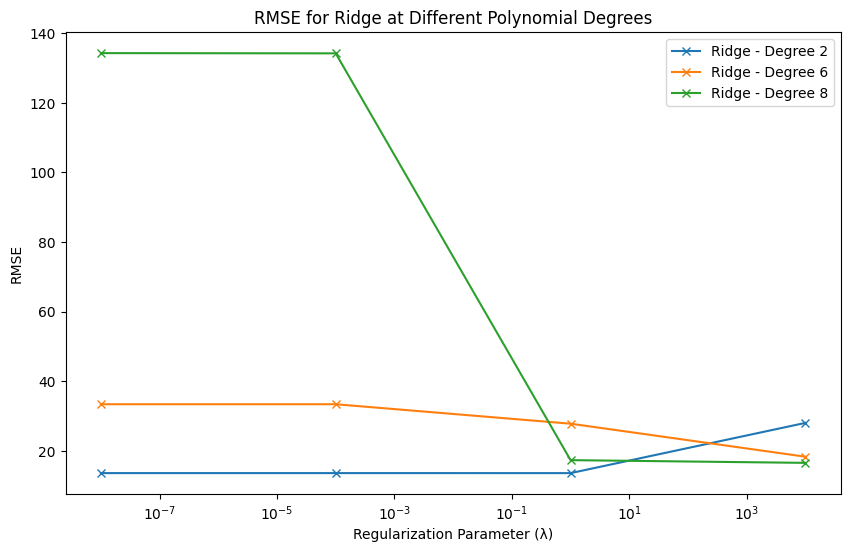

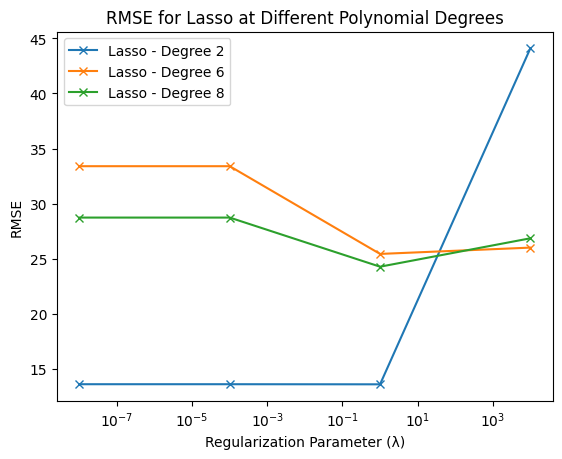

In [82]:
# plot RMSE
plt.figure(figsize=(10, 6))

for degree_idx, degree in enumerate(degrees):
    plt.plot(lambdas, ridge_rmse_test[degree_idx], marker='x', label=f'Ridge - Degree {degree}')
plt.xscale('log')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('RMSE')
plt.title('RMSE for Ridge at Different Polynomial Degrees')
plt.legend()
plt.show()

for degree_idx, degree in enumerate(degrees):
  plt.plot(lambdas, lasso_rmse_test[degree_idx], marker='x', label=f'Lasso - Degree {degree}')

plt.xscale('log')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('RMSE')
plt.title('RMSE for Lasso at Different Polynomial Degrees')
plt.legend()
plt.show()

#  Example

In [47]:
from google.colab import files
uploaded = files.upload()


Saving data_study2.csv to data_study2.csv


In [48]:
import pandas as pd

df = pd.read_csv('data_study2.csv')
df.head()


,studytime,Absence,age,G1,G2,G3
0,2,5,15,10,11,11
1,4,2,16,11,13,13
2,6,1,16,13,14,14
3,7,0,17,15,15,15
4,8,0,17,16,17,17


In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# شبیه‌سازی داده‌های Lernova
np.random.seed(42)
n_samples = 1000

#data = {
   # "practice_time": np.random.uniform(0, 60, n_samples),
  #  "age": np.random.randint(6, 18, n_samples),
  #  "interactions": np.random.randint(10, 200, n_samples),
#    "happiness_level": np.random.uniform(0, 1, n_samples),
 #   "focus_level": np.random.uniform(0, 1, n_samples),
#    "performance_score": np.random.uniform(0, 100, n_samples)
#}

#df = pd.DataFrame(data)

# Separation of features and purpose
X = df[[ "studytime", "Absence","age","G1","G2"]]
y = df["G3"]
#X = df.drop("performance_score", axis=1)
#y = df["performance_score"]

# Display feature names
feature_names = list(X.columns)
print("Feature names:", feature_names)

# Feature normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Feature names: ['studytime', 'Absence', 'age', 'G1', 'G2']


## Implement Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 0.75


## Feature Importance

In [51]:
coefficients = model.coef_

#model.coef_ is the output of the model weights. Depending on the shape of the data, it may be 2D (e.g. (1, 4) for 4 features).

#ravel() converts this to a 1D array like [0.4, -1.2, 0.05, 0.9] to make it easier to work with.
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.3f}")
#zip(feature_names, coefficients) means for each feature, get the corresponding coefficient value.

#f"{coef:.3f}" means print the coefficient up to 3 decimal places.


#Output interpretation:

#If the coefficient is positive: As that feature increases, the predicted value of G3 increases.

#If the coefficient is negative: As that feature increases, the predicted value of G3 decreases.

studytime: 1.091
Absence: -0.183
age: -0.093
G1: -0.034
G2: 2.905


## Visualize Actual vs Predicted

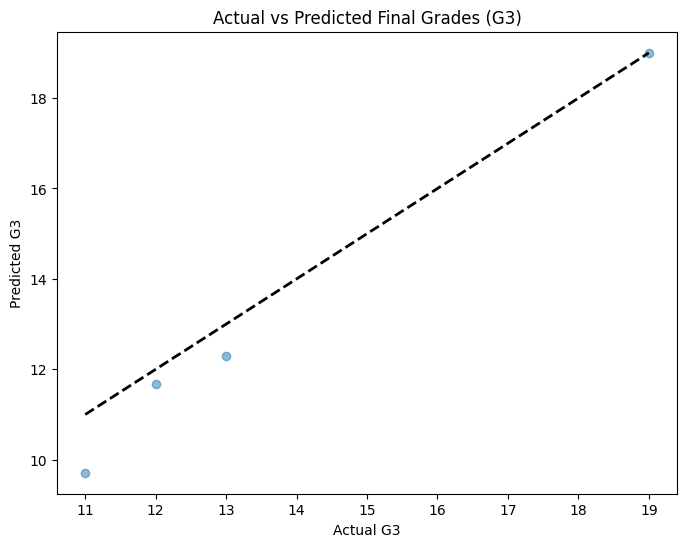

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Final Grades (G3)")
plt.show()
#If the points are close to this line, it means the model performed well.